In [476]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import analysis_utils as au
import CMR_IA as cmr
from matplotlib.lines import Line2D
from scipy.stats import norm
# from sklearn.linear_model import LinearRegression
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
SAVE_FIG = False

In [477]:
with open("simu1_data/simu1_design.pkl", 'rb') as inp:
    df = pickle.load(inp)
df = df.loc[df.session < 500]
df

,subject_ID,position,item,itemno,category_label,lag,old,session,study_itemno1,study_itemno2,test_itemno1,test_itemno2
0,58,0,UNDERWEAR,282,Clothing,0,False,0,282,-1,282,-1
1,58,1,JEANS,139,Clothing,0,False,0,139,-1,139,-1
2,58,2,JACKET,138,Clothing,0,False,0,138,-1,138,-1
3,58,3,TABLET,263,Electronics,0,False,0,263,-1,263,-1
4,58,4,COMPUTER,62,Electronics,0,False,0,62,-1,62,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
289995,280,575,BASKETBALL,11,Toys,0,False,499,11,-1,11,-1
289996,280,576,PRINTER,210,Electronics,0,False,499,210,-1,210,-1
289997,280,577,TEA,265,Beverages,19,True,499,265,-1,265,-1
289998,280,578,CIDER,55,Beverages,38,True,499,55,-1,55,-1


### Run CMR-IA

In [478]:
s_mat = np.load('simu1_data/simu1_300_smat.npy')

1. s_fc控制FAR两条线的差距
2. c_thresh_item控制FAR的高低
3. gamma控制HR的高低
4. beta控制HR的曲率

In [479]:
# 0.07763692 0.29688559 0.30202563 0.32527225 0.62870206
# 0.07203608 0.29538901 0.30228773 0.34384433 0.61605076
# 0.06303219 0.0992355  0.21488122 0.19815079 0.76851669
# 0.05135588 0.20492208 0.17292792 0.19230073 0.56064881
params = cmr.make_default_params()
params.update(
    beta_enc = 0.05,  # 0.05
    beta_rec_post = 0.10,  # 0.01
    s_fc = 0.01,  # 0.096, 0.08?
    gamma_fc = 0.07,  # 0.1
    c_thresh_itm = 0.04,  # 0.415? 0.275 - 0.05
    use_new_context = True,
)
params

{'beta_enc': 0.05,
 'beta_rec': 0.5,
 'beta_cue': 0.5,
 'beta_rec_post': 0.1,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.01,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.5,
 'c_thresh_itm': 0.04,
 'c_thresh_ass': 0.5,
 'd_ass': 1,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.07,
 'gamma_cf': 0.5,
 'use_new_context': True}

In [480]:
df_simu = cmr.run_conti_recog_multi_sess(params,df,s_mat,mode='Continuous')

100%|██████████| 500/500 [05:37<00:00,  1.48it/s]

CMR Time: 337.89836502075195


In [481]:
df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,subject_ID,item,itemno,category_label,lag,old
0,0,0,282,-1,282,-1,0.0,1258.121216,0.000000,58,UNDERWEAR,282,Clothing,0,False
1,0,1,139,-1,139,-1,0.0,1278.347168,0.000797,58,JEANS,139,Clothing,0,False
2,0,2,138,-1,138,-1,0.0,1295.134277,0.001450,58,JACKET,138,Clothing,0,False
3,0,3,263,-1,263,-1,0.0,1289.022705,0.001213,58,TABLET,263,Electronics,0,False
4,0,4,62,-1,62,-1,0.0,1312.314453,0.002109,58,COMPUTER,62,Electronics,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289995,499,575,11,-1,11,-1,1.0,2408.400146,0.047533,280,BASKETBALL,11,Toys,0,False
289996,499,576,210,-1,210,-1,1.0,2440.768555,0.046865,280,PRINTER,210,Electronics,0,False
289997,499,577,265,-1,265,-1,1.0,469.261627,0.129311,280,TEA,265,Beverages,19,True
289998,499,578,55,-1,55,-1,1.0,654.290039,0.112691,280,CIDER,55,Beverages,38,True


In [482]:
# df_simu.to_pickle("simu1_data/simu1_result.pkl")

### Preprocesssing

In [483]:
# with open("simu1_data/simu1_result.pkl", 'rb') as inp:
#     df_simu = pickle.load(inp)

In [484]:
# manual_csim = 0.65
# df_simu['s_resp'] = df_simu['csim'] > manual_csim
# df_simu

In [485]:
# randomly choose 100 number from 0-999
# np.random.seed(5)
# rand_idx = np.random.choice(1000, 200, replace=False)
# df_simu = df_simu.loc[df_simu.session.isin(rand_idx)]
# df_simu = df_simu.reset_index(drop=True)
# df_simu

In [486]:
# calculate the rolling category length
rolling_window = 9
category_label_dummies = df_simu['category_label'].str.get_dummies()
category_label_dummies.columns = ['cl_' + col for col in category_label_dummies.columns]
category_label_dummies_events = pd.concat([df_simu, category_label_dummies], axis=1) # record the occurrence of every cat label
cl_rolling_sum = category_label_dummies_events.groupby('session').rolling(rolling_window, min_periods=1, on='position')[category_label_dummies.columns].sum().reset_index()
df_rollcat = df_simu.merge(cl_rolling_sum, on=['session', 'position'])
df_simu['roll_cat_label_length'] = df_rollcat.apply(lambda x: x['cl_' + x['category_label']], axis = 1) # how many cat within 10 window
df_simu['roll_cat_label_length'] = df_simu['roll_cat_label_length'] - 1 # how many cat in previous 9 window. not include self

# add rolling category length level
# option = "0-1-2+"
option = "0+1-2+"
# option = "0-1+"
if option == "0-1-2+":
    # option 0: 0, 1, >=2
    df_simu['roll_cat_len_level']= pd.cut(x=df_simu.roll_cat_label_length, 
                                    bins=[0, 1, 2, np.inf], right=False, include_lowest = True,
                                    labels=['0', '1', '>=2']).astype('str')
elif option == "0+1-2+":
    # option 1: 0-1, >=2
    df_simu['roll_cat_len_level']= pd.cut(x=df_simu.roll_cat_label_length, 
                                    bins=[0, 2, np.inf], right=False, include_lowest = True,
                                    labels=['0-1', '>=2']).astype('str')
elif option == "0-1+":
    # option 2: 0, >=1
    df_simu['roll_cat_len_level']= pd.cut(x=df_simu.roll_cat_label_length, 
                                    bins=[0, 1, np.inf], right=False, include_lowest = True,
                                    labels=['0', '>=1']).astype('str')
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,subject_ID,item,itemno,category_label,lag,old,roll_cat_label_length,roll_cat_len_level
0,0,0,282,-1,282,-1,0.0,1258.121216,0.000000,58,UNDERWEAR,282,Clothing,0,False,0.0,0-1
1,0,1,139,-1,139,-1,0.0,1278.347168,0.000797,58,JEANS,139,Clothing,0,False,1.0,0-1
2,0,2,138,-1,138,-1,0.0,1295.134277,0.001450,58,JACKET,138,Clothing,0,False,2.0,>=2
3,0,3,263,-1,263,-1,0.0,1289.022705,0.001213,58,TABLET,263,Electronics,0,False,0.0,0-1
4,0,4,62,-1,62,-1,0.0,1312.314453,0.002109,58,COMPUTER,62,Electronics,0,False,1.0,0-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289995,499,575,11,-1,11,-1,1.0,2408.400146,0.047533,280,BASKETBALL,11,Toys,0,False,1.0,0-1
289996,499,576,210,-1,210,-1,1.0,2440.768555,0.046865,280,PRINTER,210,Electronics,0,False,1.0,0-1
289997,499,577,265,-1,265,-1,1.0,469.261627,0.129311,280,TEA,265,Beverages,19,True,1.0,0-1
289998,499,578,55,-1,55,-1,1.0,654.290039,0.112691,280,CIDER,55,Beverages,38,True,2.0,>=2


In [487]:
# add log and log lag bin
df_simu['log_lag'] = np.log(df_simu['lag'])
df_simu['log_lag_bin'] = pd.cut(df_simu['log_lag'], np.arange(df_simu['log_lag'].max()+1), labels=False, right=False)
df_simu

/Users/bei/anaconda3/envs/cmr/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,subject_ID,item,itemno,category_label,lag,old,roll_cat_label_length,roll_cat_len_level,log_lag,log_lag_bin
0,0,0,282,-1,282,-1,0.0,1258.121216,0.000000,58,UNDERWEAR,282,Clothing,0,False,0.0,0-1,-inf,NaN
1,0,1,139,-1,139,-1,0.0,1278.347168,0.000797,58,JEANS,139,Clothing,0,False,1.0,0-1,-inf,NaN
2,0,2,138,-1,138,-1,0.0,1295.134277,0.001450,58,JACKET,138,Clothing,0,False,2.0,>=2,-inf,NaN
3,0,3,263,-1,263,-1,0.0,1289.022705,0.001213,58,TABLET,263,Electronics,0,False,0.0,0-1,-inf,NaN
4,0,4,62,-1,62,-1,0.0,1312.314453,0.002109,58,COMPUTER,62,Electronics,0,False,1.0,0-1,-inf,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289995,499,575,11,-1,11,-1,1.0,2408.400146,0.047533,280,BASKETBALL,11,Toys,0,False,1.0,0-1,-inf,NaN
289996,499,576,210,-1,210,-1,1.0,2440.768555,0.046865,280,PRINTER,210,Electronics,0,False,1.0,0-1,-inf,NaN
289997,499,577,265,-1,265,-1,1.0,469.261627,0.129311,280,TEA,265,Beverages,19,True,1.0,0-1,2.944439,2.0
289998,499,578,55,-1,55,-1,1.0,654.290039,0.112691,280,CIDER,55,Beverages,38,True,2.0,>=2,3.637586,3.0


In [488]:
# construct local FAR
# for i in range(1, len(df_simu)):
#     if df_simu.loc[i, 'old'] == False and df_simu.loc[i-1, 'old'] == True:
#         df_simu.loc[i, 'log_lag_bin'] = df_simu.loc[i-1, 'log_lag_bin']
old_vec = df_simu.old.to_numpy()
log_lag_bin_vec = df_simu.log_lag_bin.to_numpy()
position_vec = df_simu.position.to_numpy()
max_position = np.max(position_vec)
log_lag_bin_newpre_lst = []
log_lag_bin_newpost_lst = []
for i in range(len(df_simu)):
    if position_vec[i] > 0:
        if old_vec[i] == False and old_vec[i-1] == True:
            log_lag_bin_newpre_lst.append(log_lag_bin_vec[i-1])
        else:
            log_lag_bin_newpre_lst.append('N')
    else:
        log_lag_bin_newpre_lst.append('N')

    if position_vec[i] < max_position:
        if old_vec[i] == False and old_vec[i+1] == True:
            log_lag_bin_newpost_lst.append(log_lag_bin_vec[i+1])
        else:
            log_lag_bin_newpost_lst.append('N')
    else:
        log_lag_bin_newpost_lst.append('N')

df_simu['log_lag_bin_newpre'] = log_lag_bin_newpre_lst
df_simu['log_lag_bin_newpost'] = log_lag_bin_newpost_lst
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,subject_ID,...,itemno,category_label,lag,old,roll_cat_label_length,roll_cat_len_level,log_lag,log_lag_bin,log_lag_bin_newpre,log_lag_bin_newpost
0,0,0,282,-1,282,-1,0.0,1258.121216,0.000000,58,...,282,Clothing,0,False,0.0,0-1,-inf,NaN,N,N
1,0,1,139,-1,139,-1,0.0,1278.347168,0.000797,58,...,139,Clothing,0,False,1.0,0-1,-inf,NaN,N,N
2,0,2,138,-1,138,-1,0.0,1295.134277,0.001450,58,...,138,Clothing,0,False,2.0,>=2,-inf,NaN,N,N
3,0,3,263,-1,263,-1,0.0,1289.022705,0.001213,58,...,263,Electronics,0,False,0.0,0-1,-inf,NaN,N,N
4,0,4,62,-1,62,-1,0.0,1312.314453,0.002109,58,...,62,Electronics,0,False,1.0,0-1,-inf,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289995,499,575,11,-1,11,-1,1.0,2408.400146,0.047533,280,...,11,Toys,0,False,1.0,0-1,-inf,NaN,N,N
289996,499,576,210,-1,210,-1,1.0,2440.768555,0.046865,280,...,210,Electronics,0,False,1.0,0-1,-inf,NaN,N,2.0
289997,499,577,265,-1,265,-1,1.0,469.261627,0.129311,280,...,265,Beverages,19,True,1.0,0-1,2.944439,2.0,N,N
289998,499,578,55,-1,55,-1,1.0,654.290039,0.112691,280,...,55,Beverages,38,True,2.0,>=2,3.637586,3.0,N,N


In [489]:
df_simu['log_lag_bin'] = df_simu.apply(lambda x: 0 if x['log_lag_bin'] == 1 else x['log_lag_bin'], axis = 1)
df_simu['log_lag_bin_newpre'] = df_simu.apply(lambda x: 0 if x['log_lag_bin_newpre'] == 1 else x['log_lag_bin_newpre'], axis = 1)
df_simu['log_lag_bin_newpost'] = df_simu.apply(lambda x: 0 if x['log_lag_bin_newpost'] == 1 else x['log_lag_bin_newpost'], axis = 1)
# distribute items into bins
log_lag_bins = [0, 2, 3, 4, 5]
for bin in log_lag_bins:
    col_name = "log_lag_bin_" + str(bin)
    df_simu[col_name] = (df_simu.log_lag_bin == bin) | (df_simu.log_lag_bin_newpre == bin) | (df_simu.log_lag_bin_newpost == bin)
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,subject_ID,...,roll_cat_len_level,log_lag,log_lag_bin,log_lag_bin_newpre,log_lag_bin_newpost,log_lag_bin_0,log_lag_bin_2,log_lag_bin_3,log_lag_bin_4,log_lag_bin_5
0,0,0,282,-1,282,-1,0.0,1258.121216,0.000000,58,...,0-1,-inf,NaN,N,N,False,False,False,False,False
1,0,1,139,-1,139,-1,0.0,1278.347168,0.000797,58,...,0-1,-inf,NaN,N,N,False,False,False,False,False
2,0,2,138,-1,138,-1,0.0,1295.134277,0.001450,58,...,>=2,-inf,NaN,N,N,False,False,False,False,False
3,0,3,263,-1,263,-1,0.0,1289.022705,0.001213,58,...,0-1,-inf,NaN,N,N,False,False,False,False,False
4,0,4,62,-1,62,-1,0.0,1312.314453,0.002109,58,...,0-1,-inf,NaN,N,N,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289995,499,575,11,-1,11,-1,1.0,2408.400146,0.047533,280,...,0-1,-inf,NaN,N,N,False,False,False,False,False
289996,499,576,210,-1,210,-1,1.0,2440.768555,0.046865,280,...,0-1,-inf,NaN,N,2.0,False,True,False,False,False
289997,499,577,265,-1,265,-1,1.0,469.261627,0.129311,280,...,0-1,2.944439,2.0,N,N,False,True,False,False,False
289998,499,578,55,-1,55,-1,1.0,654.290039,0.112691,280,...,>=2,3.637586,3.0,N,N,False,False,True,False,False


In [490]:
df_simu.groupby(["old", "log_lag_bin", "roll_cat_len_level"]).s_resp.count()

old   log_lag_bin  roll_cat_len_level
True  0.0          0-1                    9616
                   >=2                   18634
      2.0          0-1                   23517
                   >=2                    9056
      3.0          0-1                   38121
                   >=2                    4270
      4.0          0-1                   28597
                   >=2                    1784
      5.0          0-1                    6052
                   >=2                     297
      6.0          0-1                      56
Name: s_resp, dtype: int64

### Recency & Similarity

In [491]:
df_lst = []
for bin in log_lag_bins:
    col_name = "log_lag_bin_" + str(bin)
    df_tmp = df_simu.query(col_name + " == True").groupby(["session", "old", "roll_cat_len_level"])['s_resp'].agg(['mean', 'sum', 'count']).reset_index()
    df_tmp["log_lag_bin"] = bin
    df_lst.append(df_tmp)
df_rollcat_laggp = pd.concat(df_lst)
df_rollcat_laggp.rename(columns={'mean': 'yes_rate'}, inplace=True)
df_rollcat_laggp['yes_rate_adj'] = (df_rollcat_laggp['sum'] + 0.5) / (df_rollcat_laggp['count'] + 1)
df_rollcat_laggp

,session,old,roll_cat_len_level,yes_rate,sum,count,log_lag_bin,yes_rate_adj
0,0,False,0-1,0.681818,15.0,22,0,0.673913
1,0,False,>=2,0.454545,5.0,11,0,0.458333
2,0,True,0-1,1.000000,3.0,3,0,0.875000
3,0,True,>=2,1.000000,27.0,27,0,0.982143
4,1,False,0-1,0.750000,30.0,40,0,0.743902
...,...,...,...,...,...,...,...,...
1351,498,False,>=2,1.000000,3.0,3,5,0.875000
1352,498,True,0-1,1.000000,5.0,5,5,0.916667
1353,499,False,0-1,1.000000,4.0,4,5,0.900000
1354,499,True,0-1,1.000000,3.0,3,5,0.875000


In [492]:
# # mean of log bin for every subject
# df_simu['log_lag_bin'] = df_simu.apply(lambda x: 0 if x['log_lag_bin'] == 1 else x['log_lag_bin'], axis = 1)
# df_5 = df_simu.query('log_lag_bin <= 5')

# # count and add 0.5 / 1 to numerator / denominator, to avoid 0 and 1
# df_rollcat_laggp = df_5.groupby(['session','old','roll_cat_len_level','log_lag_bin'])['s_resp'].agg(['mean', 'sum', 'count']).reset_index()
# df_rollcat_laggp.rename(columns={'mean': 'yes_rate'}, inplace=True)
# df_rollcat_laggp['yes_rate_adj'] = (df_rollcat_laggp['sum'] + 0.5) / (df_rollcat_laggp['count'] + 1)
# # df_rollcat_laggp = df_5.groupby(['subject_ID','old','roll_cat_len_level','log_lag_bin'])['yes'].mean().to_frame(name='yes_rate').reset_index()

In [493]:
# log lag for display
df_rollcat_laggp['log_lag_disp'] = np.ceil(np.e**df_rollcat_laggp.log_lag_bin)
df_rollcat_laggp

,session,old,roll_cat_len_level,yes_rate,sum,count,log_lag_bin,yes_rate_adj,log_lag_disp
0,0,False,0-1,0.681818,15.0,22,0,0.673913,1.0
1,0,False,>=2,0.454545,5.0,11,0,0.458333,1.0
2,0,True,0-1,1.000000,3.0,3,0,0.875000,1.0
3,0,True,>=2,1.000000,27.0,27,0,0.982143,1.0
4,1,False,0-1,0.750000,30.0,40,0,0.743902,1.0
...,...,...,...,...,...,...,...,...,...
1351,498,False,>=2,1.000000,3.0,3,5,0.875000,149.0
1352,498,True,0-1,1.000000,5.0,5,5,0.916667,149.0
1353,499,False,0-1,1.000000,4.0,4,5,0.900000,149.0
1354,499,True,0-1,1.000000,3.0,3,5,0.875000,149.0


In [494]:
# pivot for hr and far
df_rollcat_laggp['old'] = df_rollcat_laggp['old'].astype('str')
df_dprime = pd.pivot_table(df_rollcat_laggp, values=['yes_rate', 'yes_rate_adj'], index=['session', 'roll_cat_len_level', 'log_lag_disp'], columns='old').reset_index()
df_dprime.columns = [' '.join(col).strip() for col in df_dprime.columns.values]
df_dprime = df_dprime.rename(columns={'yes_rate False': 'far', 'yes_rate True': 'hr', 'yes_rate_adj False': 'far_adj', 'yes_rate_adj True': 'hr_adj'})

# df_dprime = au.loftus_masson(df_dprime, 'subject_ID', ['roll_cat_len_level', 'log_lag_disp'], 'hr') - previous wrong!!
df_dprime

,session,roll_cat_len_level,log_lag_disp,far,hr,far_adj,hr_adj
0,0,0-1,1.0,0.681818,1.0,0.673913,0.875000
1,0,0-1,8.0,0.740741,1.0,0.732143,0.987179
2,0,0-1,21.0,0.785714,1.0,0.780702,0.994444
3,0,0-1,55.0,0.847826,1.0,0.840426,0.992958
4,0,0-1,149.0,1.000000,1.0,0.975000,0.982759
...,...,...,...,...,...,...,...
4794,499,>=2,1.0,0.727273,1.0,0.717391,0.985714
4795,499,>=2,8.0,0.666667,1.0,0.660000,0.973684
4796,499,>=2,21.0,0.666667,1.0,0.661765,0.958333
4797,499,>=2,55.0,0.833333,1.0,0.815789,0.916667


In [495]:
# calculate dprime
df_dprime['z_hr'] = norm.ppf(df_dprime['hr_adj'])
df_dprime['z_far'] = norm.ppf(df_dprime['far_adj'])
df_dprime['dprime'] = df_dprime['z_hr'] - df_dprime['z_far']
df_dprime

,session,roll_cat_len_level,log_lag_disp,far,hr,far_adj,hr_adj,z_hr,z_far,dprime
0,0,0-1,1.0,0.681818,1.0,0.673913,0.875000,1.150349,0.450744,0.699605
1,0,0-1,8.0,0.740741,1.0,0.732143,0.987179,2.231606,0.619307,1.612299
2,0,0-1,21.0,0.785714,1.0,0.780702,0.994444,2.539185,0.774565,1.764619
3,0,0-1,55.0,0.847826,1.0,0.840426,0.992958,2.455101,0.996208,1.458893
4,0,0-1,149.0,1.000000,1.0,0.975000,0.982759,2.114381,1.959964,0.154417
...,...,...,...,...,...,...,...,...,...,...
4794,499,>=2,1.0,0.727273,1.0,0.717391,0.985714,2.189350,0.575109,1.614240
4795,499,>=2,8.0,0.666667,1.0,0.660000,0.973684,1.937932,0.412463,1.525468
4796,499,>=2,21.0,0.666667,1.0,0.661765,0.958333,1.731664,0.417284,1.314380
4797,499,>=2,55.0,0.833333,1.0,0.815789,0.916667,1.382994,0.899435,0.483559


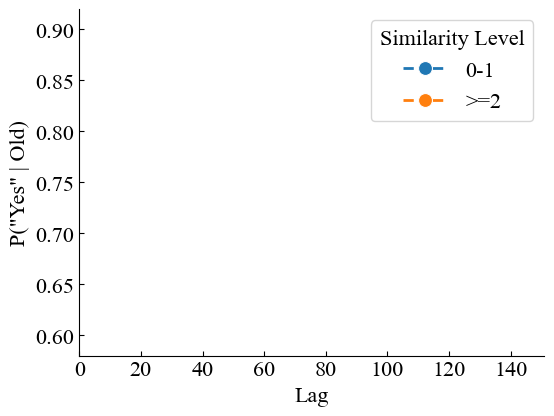

In [496]:
fig, ax = plt.subplots(figsize=(6,4.5))
# fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_dprime, y='hr', x='log_lag_disp', hue = 'roll_cat_len_level', marker = 'o', markersize = 10, linestyle='--', lw=2, ax=ax, errorbar=None)
plt.ylabel('P("Yes" | Old)')
plt.xlabel('Lag')
# ax.set(xlabel=None, ylabel=None)
# selected_lag = np.array([1,np.e,np.e**2,np.e**3,np.e**4,np.e**5])
# plt.xticks(ticks=selected_lag, labels = ['1','e','e2','e3','e4','e5'])
plt.xticks(ticks=np.arange(0,160,20))
plt.ylim([0.58,0.92])
plt.xlim([0,151])
# legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='--',label = 'Low'),
#                    Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='o', markersize = 10, linestyle='--', label = 'High')]
# plt.legend(handles = legend_elements, title = "Similarity Level")
plt.legend(title = "Similarity Level")

# if SAVEFIG:
#     plt.savefig(f'simu1_fig/simu1_David_hr_{option}.pdf')

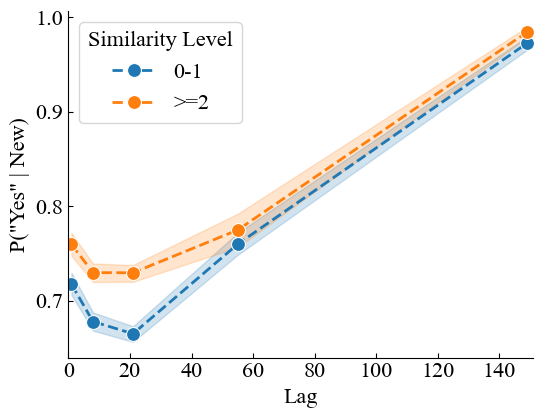

In [497]:
fig, ax = plt.subplots(figsize=(6,4.5))
# fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
# sns.lineplot(data=df_dprime, y='far', x='log_lag_disp', hue = 'roll_cat_len_level', marker = 'o', markersize = 10, linestyle='--', lw=2, ax=ax, errorbar=None)
sns.lineplot(data=df_dprime, y='far', x='log_lag_disp', hue = 'roll_cat_len_level', marker = 'o', markersize = 10, linestyle='--', lw=2, ax=ax)
plt.ylabel('P("Yes" | New)')
plt.xlabel('Lag')
# ax.set(xlabel=None, ylabel=None)
# selected_lag = np.array([1,np.e,np.e**2,np.e**3,np.e**4,np.e**5])
# plt.xticks(ticks=selected_lag, labels = ['1','e','e2','e3','e4','e5'])
plt.xticks(ticks=np.arange(0,160,20))
# plt.ylim([0.15,0.30])
plt.xlim([0,151])
# legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='--',label = 'Low'),
#                    Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='o', markersize = 10, linestyle='--', label = 'High')]
# plt.legend(handles = legend_elements, title = "Similarity Level")
plt.legend(title = "Similarity Level")

# if SAVEFIG:
#     plt.savefig(f'simu1_fig/simu1_David_far_{option}.pdf')

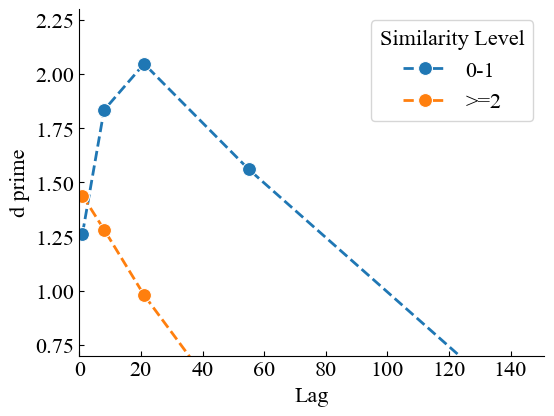

In [498]:
fig, ax = plt.subplots(figsize=(6,4.5))
# fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_dprime, y='dprime', x='log_lag_disp', hue = 'roll_cat_len_level', marker = 'o', markersize = 10, linestyle='--', lw=2, ax=ax, errorbar=None)
plt.ylabel('d prime')
plt.xlabel('Lag')
# ax.set(xlabel=None, ylabel=None)
# selected_lag = np.array([1,np.e,np.e**2,np.e**3,np.e**4,np.e**5])
# plt.xticks(ticks=selected_lag, labels = ['1','e','e2','e3','e4','e5'])
plt.xticks(ticks=np.arange(0,160,20))
plt.ylim([0.70, 2.30])
plt.xlim([0,151])
# legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='--',label = 'Low'),
#                    Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='o', markersize = 10, linestyle='--', label = 'High')]
# plt.legend(handles = legend_elements, title = "Similarity Level")
plt.legend(title = "Similarity Level")

# if SAVEFIG:
#     plt.savefig(f'simu1_fig/simu1_David_dprime_{option}.pdf')

In [499]:
df_hrfar = df_dprime.groupby(['roll_cat_len_level', 'log_lag_disp'])[['hr', 'far']].mean().reset_index()
hr_lowsim = df_hrfar.query('roll_cat_len_level == "0-1"').hr.to_numpy()
hr_highsim = df_hrfar.query('roll_cat_len_level == ">=2"').hr.to_numpy()
far_lowsim = df_hrfar.query('roll_cat_len_level == "0-1"').far.to_numpy()
far_highsim = df_hrfar.query('roll_cat_len_level == ">=2"').far.to_numpy()
hr_lowsim, hr_highsim, far_lowsim, far_highsim

(array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([0.71745234, 0.6778483 , 0.66496596, 0.75989119, 0.97288717]),
 array([0.75968548, 0.72971408, 0.72955439, 0.77487393, 0.98464409]))

In [500]:
hr_lowsim_gt = np.array([0.885, 0.853, 0.787, 0.682, 0.630])
hr_highsim_gt = np.array([0.893, 0.858, 0.795, 0.720, 0.671])
far_lowsim_gt = np.array([0.190, 0.190, 0.190, 0.195, 0.212])
far_highsim_gt = np.array([0.202, 0.210, 0.216, 0.229, 0.237]) # a bit diff from real gt
pow_err = np.mean(np.power(hr_lowsim - hr_lowsim_gt, 2)) + np.mean(np.power(hr_highsim - hr_highsim_gt, 2)) \
    + np.mean(np.power(far_lowsim - far_lowsim_gt, 2)) + np.mean(np.power(far_highsim - far_highsim_gt, 2))
abs_err = np.mean(np.abs(hr_lowsim - hr_lowsim_gt)) + np.mean(np.abs(hr_highsim - hr_highsim_gt)) \
    + np.mean(np.abs(far_lowsim - far_lowsim_gt)) + np.mean(np.abs(far_highsim - far_highsim_gt))
err = pow_err + abs_err / 10
err

0.9425615221767474

### Az

In [501]:
def calculate_Az(df_tmp1):
    log_lag_bins = [0, 2, 3, 4, 5]
    Azs = []
    for bin in log_lag_bins:

        # get the df of this log_lag_bin
        col_name = "log_lag_bin_" + str(bin)
        df_tmp = df_tmp1.query(col_name + " == True").copy()

        # get variables
        conf = df_tmp.csim.to_numpy()
        truth = df_tmp.old.to_numpy()
        old_num = np.sum(truth)
        new_num = np.sum(~truth)
        is_old = truth
        is_new = ~truth

        if np.sum(truth) == 0 or np.sum(~truth) == 0:
            Azs.append(np.nan)
            continue
        
        min_conf = np.round(np.min(conf), 2)
        max_conf = np.round(np.max(conf), 2)
        if max_conf - min_conf < 0.05:  # 0.1
            Azs.append(np.nan)
            continue

        # calculate HR and FAR for different thresholds
        step = 0.01  # 0.02
        thresholds = np.arange(min_conf+step, max_conf, step)
        hrs = []
        fars = []
        old_conf = conf * is_old
        new_conf = conf * is_new
        for thresh in thresholds:
            # hr = (np.sum((conf > thresh) & is_old) + 0.5) / (old_num + 1)
            # far = (np.sum((conf > thresh) & is_new) + 0.5) / (new_num + 1)
            hr = (np.sum(old_conf > thresh) + 0.5) / (old_num + 1)
            far = (np.sum(new_conf > thresh) + 0.5) / (new_num + 1)
            hrs.append(hr)
            fars.append(far)

        # calculate z_hr and z_far
        z_hr = norm.ppf(hrs)
        z_far = norm.ppf(fars)

        # # linear regression on z_hr and z_far using sklearn
        # X = np.array(z_far).reshape(-1, 1)
        # y = np.array(z_hr)
        # reg = LinearRegression().fit(X, y)
        # # get slope and intercept 
        # slope = reg.coef_[0]
        # intercept = reg.intercept_

        # linear regression on z_hr and z_far manually
        n = len(z_far)
        X = np.column_stack((np.ones(n), z_far))
        beta = np.linalg.inv(X.T @ X) @ X.T @ z_hr
        intercept, slope = beta

        # get A_z
        Az = norm.cdf(intercept/np.sqrt(1+slope**2))
        Azs.append(Az)

    # df to return
    df_return = pd.DataFrame({'log_lag_bin': log_lag_bins, 'Az': Azs})
    
    return df_return

In [502]:
df_Az = df_simu.groupby(["session", "roll_cat_len_level"]).apply(calculate_Az).reset_index()
df_Az.drop(columns = 'level_2', inplace = True)
df_Az['log_lag_disp'] = np.ceil(np.e**df_Az.log_lag_bin)
df_Az

/var/folders/js/fb9kwys10ln8jgq1bxxqg0tr0000gn/T/ipykernel_1292/1777967579.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_Az = df_simu.groupby(["session", "roll_cat_len_level"]).apply(calculate_Az).reset_index()


,session,roll_cat_len_level,log_lag_bin,Az,log_lag_disp
0,0,0-1,0,0.845405,1.0
1,0,0-1,2,0.943782,8.0
2,0,0-1,3,0.973179,21.0
3,0,0-1,4,0.945639,55.0
4,0,0-1,5,0.948512,149.0
...,...,...,...,...,...
4995,499,>=2,0,0.964964,1.0
4996,499,>=2,2,0.917147,8.0
4997,499,>=2,3,0.938973,21.0
4998,499,>=2,4,0.890107,55.0


In [503]:
# pickup those rows where Az is Nan in df_Az
df_Az.loc[df_Az.Az.isna()]

,session,roll_cat_len_level,log_lag_bin,Az,log_lag_disp
9,0,>=2,5,NaN,149.0
14,1,0-1,5,NaN,149.0
19,1,>=2,5,NaN,149.0
24,2,0-1,5,NaN,149.0
29,2,>=2,5,NaN,149.0
...,...,...,...,...,...
4979,497,>=2,5,NaN,149.0
4984,498,0-1,5,NaN,149.0
4989,498,>=2,5,NaN,149.0
4994,499,0-1,5,NaN,149.0


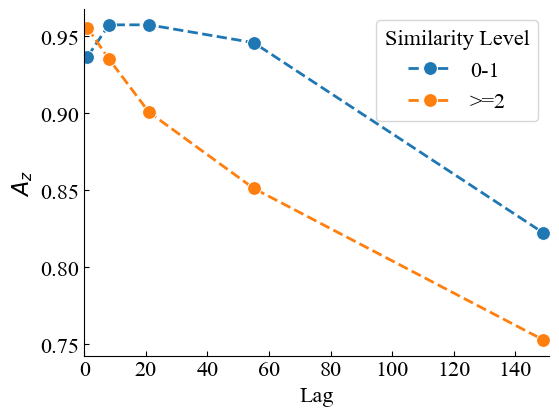

In [504]:
fig, ax = plt.subplots(figsize=(6,4.5))
# fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_Az, y='Az', x='log_lag_disp', hue = 'roll_cat_len_level', marker = 'o', markersize = 10, linestyle='--', lw=2, ax=ax, errorbar=None)
plt.ylabel('$A_z$')
plt.xlabel('Lag')
# ax.set(xlabel=None, ylabel=None)
# selected_lag = np.array([1,np.e,np.e**2,np.e**3,np.e**4,np.e**5])
# plt.xticks(ticks=selected_lag, labels = ['1','e','e2','e3','e4','e5'])
plt.xticks(ticks=np.arange(0,160,20))
# plt.ylim([0.58,0.92])
plt.xlim([0,151])
# legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='--',label = 'Low'),
#                    Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='o', markersize = 10, linestyle='--', label = 'High')]
# plt.legend(handles = legend_elements, title = "Similarity Level")
plt.legend(title = "Similarity Level")

# if SAVEFIG:
#     plt.savefig(f'simu1_fig/simu1_David_Az_{option}.pdf')

In [505]:
df_plot = df_Az.groupby(["roll_cat_len_level", "log_lag_bin"]).Az.mean().to_frame(name="Az").reset_index()
Az_lowsim = df_plot.query("roll_cat_len_level == '0-1'").Az.to_numpy()
Az_highsim = df_plot.query("roll_cat_len_level == '>=2'").Az.to_numpy()
Az_lowsim, Az_highsim

(array([0.93680666, 0.95751407, 0.95752566, 0.94592284, 0.82241498]),
 array([0.95557515, 0.93530446, 0.9007383 , 0.85128397, 0.75286344]))

In [506]:
# ground truth
Az_lowsim_gt = np.array([0.82, 0.82, 0.80, 0.73, 0.63])
Az_highsim_gt = np.array([0.81, 0.78, 0.76, 0.69, 0.61])

# calculate the error
err = np.mean(np.power(Az_lowsim - Az_lowsim_gt, 2)) + np.mean(np.power(Az_highsim - Az_highsim_gt, 2))
err

0.050511159101548825